In [40]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import ipywidgets as ipw
from IPython.display import display

water_data = pd.read_csv("water_potability.csv")
water_data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


# Рахуємо відсоток Nanів

In [41]:
nan_count = water_data.isna().sum()
nan_count
percent_nans = (nan_count / water_data.shape[0]) * 100
percent_nans

ph                 14.987790
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Sulfate            23.840049
Conductivity        0.000000
Organic_carbon      0.000000
Trihalomethanes     4.945055
Turbidity           0.000000
Potability          0.000000
dtype: float64

Файл water_potability.csv містить метрики якості води з 3276 різних водних об'єктів.

1)Значення pH:
PH є важливим параметром при оцінці кислотно-лужного балансу води. Він також є показником кислотного або лужного стану води. ВООЗ рекомендує максимально допустимий ліміт pH від 6,5 до 8,5. Поточний діапазон дослідження становив від 6,52 до 6,83, що відповідає стандартам ВООЗ.

2)Жорсткість (Hardness):
Жорсткість в основному спричиняється солями кальцію та магнію. Ці солі розчиняються з геологічних відкладень, через які проходить вода. Тривалість контакту води з матеріалом, що спричинює жорсткість, допомагає визначити, скільки жорсткості є в сировій воді. Жорсткість спочатку була визначена як здатність води викликати осадження мила, яке спричиняється кальцієм та магнієм.

3)Розчинені речовини (Solids)
 (загальна кількість розчинених речовин - TDS):
Вода має здатність розчиняти широкий спектр неорганічних та деяких органічних мінералів або солей, таких як калій, кальцій, натрій, бікарбонати, хлориди, магній, сульфати та ін. Ці мінерали викликають небажаний смак та розріджену забарвленість води. Це важливий параметр для використання води. Вода з високим значенням TDS вказує на те, що вода дуже мінералізована. Бажана межа для TDS - 500 мг / л, а максимальна межа - 1000 мг / л, яку рекомендується використовувати для пиття.
4. Хлораміни(Chloramines):
Хлор і хлорамін є основними дезінфікуючими засобами, які використовуються в громадських системах водопостачання. Хлораміни найчастіше утворюються, коли аміак додають до хлору для очищення питної води. Рівень хлору до 4 міліграмів на літр (мг/л або 4 частки на мільйон (ppm)) вважається безпечним у питній воді.

5. Сульфат(Sulfate):
Сульфати - це природні речовини, які містяться в мінералах, ґрунті та гірських породах. Вони присутні в навколишньому повітрі, грунтових водах, рослинах і продуктах харчування. Основне комерційне використання сульфату - хімічна промисловість. Концентрація сульфату в морській воді становить близько 2700 міліграмів на літр (мг/л). Він коливається від 3 до 30 мг/л у більшості джерел прісної води, хоча в деяких географічних місцях зустрічаються значно вищі концентрації (1000 мг/л).

6. Провідність(Conductivity):
Чиста вода не є хорошим провідником електричного струму, а є хорошим ізолятором. Збільшення концентрації іонів підвищує електропровідність води. Як правило, кількість розчинених твердих речовин у воді визначає електропровідність. Електропровідність (EC) фактично вимірює іонний процес розчину, який дозволяє йому пропускати струм. Відповідно до стандартів ВООЗ значення EC не повинно перевищувати 400 мкСм/см.

7. Organic_carbon:
Загальний органічний вуглець (TOC) у вихідних водах походить від розкладаної природної органічної речовини (NOM), а також із синтетичних джерел. TOC є мірою загальної кількості вуглецю в органічних сполуках у чистій воді. Відповідно до US EPA < 2 мг/л як ТОС у очищеній/питній воді та < 4 мг/літ у вихідній воді, яка використовується для очищення.

8. Тригалометани(Trihalomethanes):
ТГМ – це хімічні речовини, які можна знайти у воді, обробленій хлором. Концентрація ТГМ у питній воді змінюється залежно від рівня органічних речовин у воді, кількості хлору, необхідної для обробки води, і температури води, яка очищується. Рівень THM до 80 ppm вважається безпечним у питній воді.

9. Каламутність(Turbidity):
Каламутність води залежить від кількості твердих речовин, які знаходяться у зваженому стані. Це міра світловипромінюючих властивостей води, і тест використовується для визначення якості скидання відходів щодо колоїдної речовини. Середнє значення каламутності, отримане для Wondo Genet Campus (0,98 NTU), нижче за рекомендоване ВООЗ значення 5,00 NTU.

10. Пригодність до питання? (Potability):
Вказує, чи безпечна вода для споживання людиною, де 1 означає питну, а 0 означає непитну.

In [42]:
# Знайти середнє значення для всього датасету
water_data = water_data.dropna()

print(np.mean(water_data))



ph                     7.085990
Hardness             195.968072
Solids             21917.441374
Chloramines            7.134338
Sulfate              333.224672
Conductivity         426.526409
Organic_carbon        14.357709
Trihalomethanes       66.400859
Turbidity              3.969729
Potability             0.403282
dtype: float64


C:\Users\Admin\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


# Заміняємо значення Nan на середні значення

In [30]:
for column in water_data.columns:
    mean_value = water_data[column].mean()
    water_data[column].replace(0, mean_value, inplace=True)
water_data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,6.019540,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,6.01954
1,3.716080,129.422921,18630.057858,6.635246,6.019540,592.885359,15.180013,56.329076,4.500656,6.01954
2,8.099124,224.236259,19909.541732,9.275884,6.019540,418.606213,16.868637,66.420093,3.055934,6.01954
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,6.01954
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,6.01954
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1.00000
3272,7.808856,193.553212,17329.802160,8.061362,6.019540,392.449580,19.903225,6.019540,2.798243,1.00000
3273,9.419510,175.762646,33155.578218,7.350233,6.019540,432.044783,11.039070,69.845400,3.298875,1.00000
3274,5.126763,230.603758,11983.869376,6.303357,6.019540,402.883113,11.168946,77.488213,4.708658,1.00000


***Ця інформація може бути корисною для визначення того, які стовпці мають більші середні значення, що може свідчити про більшу кількість речовин у воді, які можуть бути потенційно шкідливими для здоров'я людей, які споживають цю воду.***

In [83]:
#Середнє значення змінних в залежності від Potability
grouped_data = water_data.groupby('Potability').mean()

# побудова графіку
def making(names):
    indx = funcs[names]
    fig, ax = plt.subplots(figsize=(12, 8))
    sns.violinplot(x='Potability', y=cols_to_plot[indx], data=water_data, ax=ax, color='#E6B0AA')
    ax.set_ylabel(names, fontsize=14)
    ax.set_title(f'Середні значення змінних залежно від {names}', fontsize=18)
    ax.set_xlabel('Potability', fontsize=14)
funcs = {
'ph' : 0,
'Hardness' : 1,
'Solids' : 2,
'Chloramines' : 3,
'Sulfate' : 4,
'Conductivity' : 5,
'Organic_carbon' : 6,
'Trihalomethanes' : 7,
'Turbidity' : 8,
}

ipw.interact(making, names = funcs.keys())

interactive(children=(Dropdown(description='names', options=('ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfa…

<function __main__.making(names)>

In [4]:
for column in water_data.columns:
    column_median = water_data[column].median()
    print("Медіана для стовпця '", column, "':", column_median)

Медіана для стовпця ' ph ': 7.027296860302588
Медіана для стовпця ' Hardness ': 197.19183941740528
Медіана для стовпця ' Solids ': 20933.512749666126
Медіана для стовпця ' Chloramines ': 7.143906655908775
Медіана для стовпця ' Sulfate ': 332.23217745927707
Медіана для стовпця ' Conductivity ': 423.4559056800464
Медіана для стовпця ' Organic_carbon ': 14.322018870397528
Медіана для стовпця ' Trihalomethanes ': 66.54219804427565
Медіана для стовпця ' Turbidity ': 3.968177082539273
Медіана для стовпця ' Potability ': 0.0


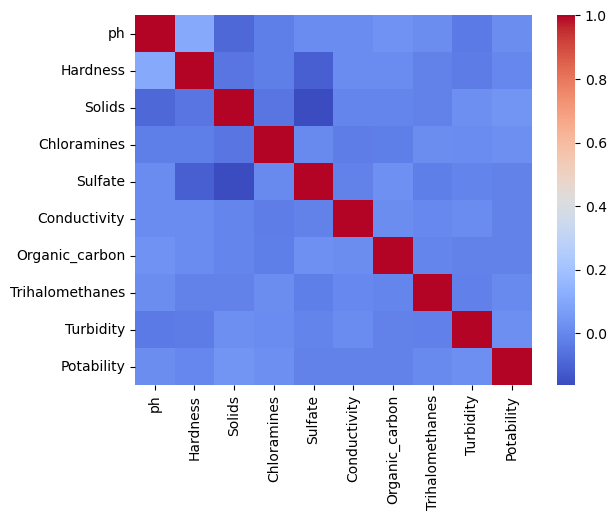

In [5]:
sns.heatmap(water_data.corr(), annot=False, cmap='coolwarm')
plt.show()

***. Теплова карта може бути корисним інструментом для виявлення залежностей між змінними і допомагає встановити, які змінні можуть бути корисними для подальшого аналізу і прогнозування***

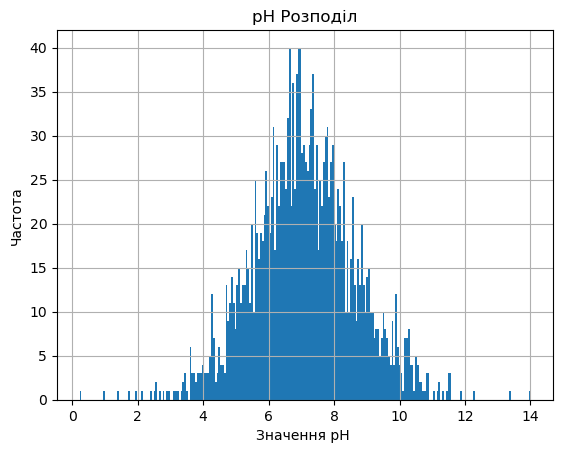

In [6]:
water_data['ph'].hist(bins = 250)
plt.title('pH Розподіл')
plt.xlabel('Значення pH ')
plt.ylabel('Частота')
plt.show()

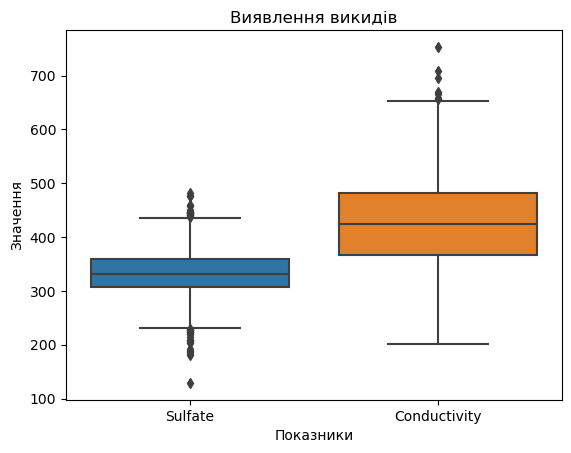

In [7]:
sns.boxplot(data=water_data[['Sulfate', 'Conductivity']])
plt.title('Виявлення викидів')
plt.xlabel('Показники')
plt.ylabel('Значення')
plt.show()

***Цей графік використовується для виявлення викидів та визначення розмаху змінної. Якщо викиди присутні, то вони зазвичай позначені окремими точками за межами ліній(вусиків) довкола показникових коробок***.

Intercept: 0.3711717828505206
Slope: 0.004531500489942065


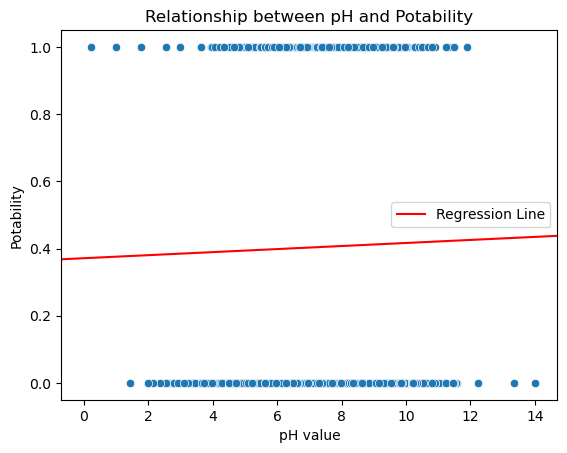

In [8]:
# Визначення залежної та незалежної змінних
X = water_data['ph'].values.reshape(-1, 1)
y = water_data['Potability'].values

# Додавання стовпця з одиницями для константного члена регресії
X = np.insert(X, 0, 1, axis=1)

# Розрахунок коефіцієнтів лінійної регресії методом найменших квадратів
coefficients = np.linalg.inv(X.T @ X) @ X.T @ y

# Виведення результатів
print('Intercept:', coefficients[0])
print('Slope:', coefficients[1])

# Графік залежності
sns.scatterplot(x='ph', y='Potability', data=water_data)
plt.title('Relationship between pH and Potability')
plt.xlabel('pH value')
plt.ylabel('Potability')
plt.axline((0, coefficients[0]), slope=coefficients[1], color='red', label='Regression Line')
plt.legend()
plt.show()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
...,...,...,...,...,...,...,...,...,...,...
3267,8.989900,215.047358,15921.412018,6.297312,312.931022,390.410231,9.899115,55.069304,4.613843,1
3268,6.702547,207.321086,17246.920347,7.708117,304.510230,329.266002,16.217303,28.878601,3.442983,1
3269,11.491011,94.812545,37188.826022,9.263166,258.930600,439.893618,16.172755,41.558501,4.369264,1
3270,6.069616,186.659040,26138.780191,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712,1


In [31]:
water_data = water_data.loc[water_data['ph'] > 6.52]
water_data = water_data.loc[water_data['ph'] < 6.83]
water_data.show()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
